In [34]:
import pandas as pd

In [35]:
user_click = pd.read_parquet('Filtered_Data/user_click_act.parquet')
user_community_inter = pd.read_parquet('Filtered_Data/user_community_inter.parquet')
user_reply_follow = pd.read_parquet('Filtered_Data/user_reply_follow.parquet')
user_user_votes = pd.read_parquet('Filtered_Data/user_user_votes.parquet')
user_activity_centrality = pd.read_parquet('Filtered_Data/user_activity_centrality.parquet')

In [36]:
user_click.head()

,UserID,clicks_in_last_90_articles
0,4,178.0
1,19,NaN
2,30,316.0
3,38,317.0
4,44,NaN


In [37]:
user_community_inter.head()

,UserID,PostsAmount,TopicsPostedIn,MostPopularTopicPostsAmount
0,28153,4.0,3.0,2.0
1,215382,597.0,58.0,183.0
2,600903,1959.0,73.0,384.0
3,128236,349.0,34.0,102.0
4,235260,20.0,9.0,8.0


In [38]:
user_reply_follow.head()

,UserID,PostReplied,UserFollowed,GotPostReplied,GotFollowers
0,4,0.0,0.0,1.0,0.0
1,30,18.0,0.0,76.0,0.0
2,38,9.0,0.0,6.0,0.0
3,77,64.0,0.0,117.0,0.0
4,106,0.0,0.0,0.0,0.0


In [39]:
user_user_votes.head()

,UserID,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive
0,4,0.0,6.0,5.0,50.0
1,30,117.0,288.0,10.0,194.0
2,38,3.0,59.0,1.0,5.0
3,77,285.0,486.0,0.0,0.0
4,106,0.0,0.0,0.0,1.0


In [40]:
user_activity_centrality.head()

,UserID,ActivityCentrality
0,4,0.004462
1,6293,0.361275
2,8008,0.316494
3,9525,0.031394
4,18764,0.235538


In [41]:
data = user_click.join(user_activity_centrality.set_index('UserID'), on='UserID',how='outer').join(user_user_votes.set_index('UserID'), on='UserID',how='outer').join(user_reply_follow.set_index('UserID'), on='UserID',how='outer').join(user_community_inter.set_index('UserID'), on='UserID',how='outer')

In [42]:
data = data.drop_duplicates()

In [43]:
data = data.dropna(subset=['clicks_in_last_90_articles',	'ActivityCentrality',	'ReceivedNegative',	'ReceivedPositive',	'VoteNegative',	'VotePositive',	'PostReplied',	'UserFollowed',	'GotPostReplied',	'GotFollowers',	'PostsAmount',	'TopicsPostedIn',	'MostPopularTopicPostsAmount'], axis= 0,thresh = 8)

In [62]:
data['ActivityCentrality'] = data['ActivityCentrality'] *1000

In [63]:
data

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,MostPopularTopicPostsAmount
0,4,178.0,4.462151,0.0,6.0,5.0,50.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
2,30,316.0,41.195219,117.0,288.0,10.0,194.0,18.0,0.0,76.0,0.0,93.0,22.0,30.0
3,38,317.0,5.896414,3.0,59.0,1.0,5.0,9.0,0.0,6.0,0.0,24.0,11.0,5.0
8,77,50.0,43.585657,285.0,486.0,0.0,0.0,64.0,0.0,117.0,0.0,349.0,31.0,94.0
10,106,498.0,0.079681,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59099,667204,119.0,2.549801,6.0,20.0,5.0,8.0,2.0,0.0,2.0,0.0,6.0,2.0,5.0
59462,674233,17.0,0.239044,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
59706,679031,364.0,1.274900,0.0,0.0,4.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59789,680740,296.0,9.960159,10.0,30.0,28.0,105.0,4.0,0.0,5.0,0.0,17.0,5.0,6.0


In [45]:
data.describe()

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,MostPopularTopicPostsAmount
count,12569.000000,12569.000000,12551.000000,12556.000000,12556.000000,12556.000000,12556.000000,12551.000000,12551.000000,12551.000000,12551.000000,12569.000000,12569.000000,12569.00000
mean,331481.866258,308.771422,0.088468,229.873128,1008.480806,229.873128,1008.480806,137.729026,1.313999,137.729026,1.313999,413.736097,25.474660,116.53433
std,216152.757130,254.986851,0.102986,565.153135,2175.842894,578.987633,2198.413789,314.500247,5.141113,282.126775,7.938125,850.214049,20.033712,281.83663
min,4.000000,8.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,124552.000000,121.000000,0.015618,4.000000,42.000000,8.000000,50.000000,4.000000,0.000000,6.000000,0.000000,18.000000,8.000000,5.00000
50%,248119.000000,243.000000,0.049721,40.000000,244.000000,44.000000,230.000000,26.000000,0.000000,33.000000,0.000000,94.000000,21.000000,24.00000
75%,542262.000000,427.000000,0.124064,196.000000,985.250000,188.000000,896.250000,118.000000,1.000000,136.000000,1.000000,395.000000,40.000000,102.00000
max,681136.000000,1986.000000,0.768845,12432.000000,44176.000000,11207.000000,27364.000000,3739.000000,103.000000,4330.000000,592.000000,9023.000000,87.000000,6228.00000


In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def clip_and_scale(data, column, lower_percentile=0, upper_percentile=100,plot=True):
    """
    Clips values of a column to the given percentiles and scales them such that:
    - Lowest value maps to -1
    - Median maps to 0
    - Maximum maps to 1

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to process.
        lower_percentile (float): The lower percentile to clip values.
        upper_percentile (float): The upper percentile to clip values.

    Returns:
        pd.Series: A new column with scaled values.
    """
    print(f"Percentiles for column '{column}':")
    for p in range(0, 101, 10):
        print(f"  {p}th percentile: {np.nanpercentile(data[column], p)}")

    # Calculate the lower and upper bounds based on percentiles
    lower_bound = np.nanpercentile(data[column], lower_percentile)
    upper_bound = np.nanpercentile(data[column], upper_percentile)

    # Clip values to the percentile range
    clipped_values = np.clip(data[column], lower_bound, upper_bound)

    # Calculate the median, min, and max of the clipped values
    median = np.nanmedian(clipped_values)
    min_value = clipped_values.min()
    max_value = clipped_values.max()

    # Scale the clipped values to the range [-1, 0, 1]
    scaled_values = (clipped_values - median) / (max_value - min_value)
    scaled_values = 2 * scaled_values  # Scale to [-1, 1]

    if plot:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data[column], label='Original Data', color='blue', fill=True, alpha=0.3)
        sns.kdeplot(clipped_values, label='Clipped Data', color='orange', fill=True, alpha=0.3)
        plt.axvline(median, color='red', linestyle='--', label='Median')
        plt.title(f'Distribution of {column} (Original, Clipped, and Scaled)')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()
    return scaled_values

In [142]:
sdata = pd.DataFrame(data)

Percentiles for column 'clicks_in_last_90_articles':
  0th percentile: 8.0
  10th percentile: 55.0
  20th percentile: 99.0
  30th percentile: 143.0
  40th percentile: 189.0
  50th percentile: 243.0
  60th percentile: 307.0
  70th percentile: 381.0
  80th percentile: 482.0
  90th percentile: 638.0
  100th percentile: 1986.0


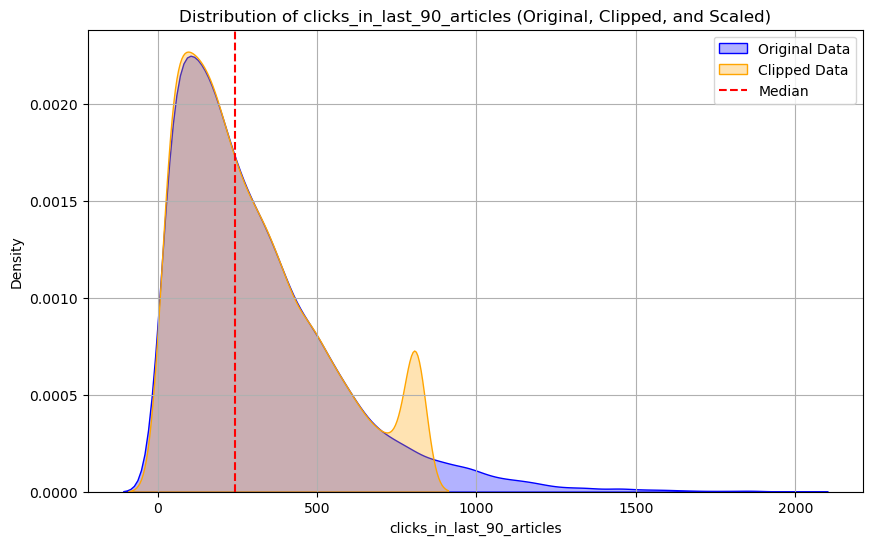

In [144]:
sdata['clicks_in_last_90_articles'] = clip_and_scale(data,'clicks_in_last_90_articles',0,95)

Percentiles for column 'ActivityCentrality':
  0th percentile: 0.0796812749003984
  10th percentile: 4.621513944223108
  20th percentile: 11.235059760956176
  30th percentile: 20.557768924302792
  40th percentile: 32.98804780876495
  50th percentile: 49.72111553784861
  60th percentile: 72.19123505976096
  70th percentile: 103.26693227091634
  80th percentile: 150.3585657370518
  90th percentile: 232.82868525896416
  100th percentile: 768.8446215139443


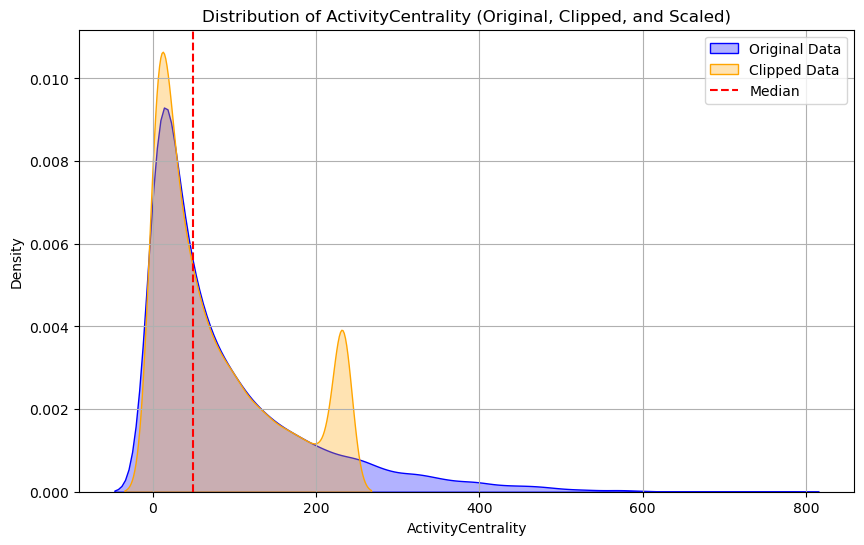

In [145]:
sdata['ActivityCentrality'] = clip_and_scale(data,'ActivityCentrality',0,90)

Percentiles for column 'ReceivedNegative':
  0th percentile: 0.0
  10th percentile: 0.0
  20th percentile: 2.0
  30th percentile: 8.0
  40th percentile: 20.0
  50th percentile: 40.0
  60th percentile: 77.0
  70th percentile: 141.0
  80th percentile: 276.0
  90th percentile: 604.5
  100th percentile: 12432.0


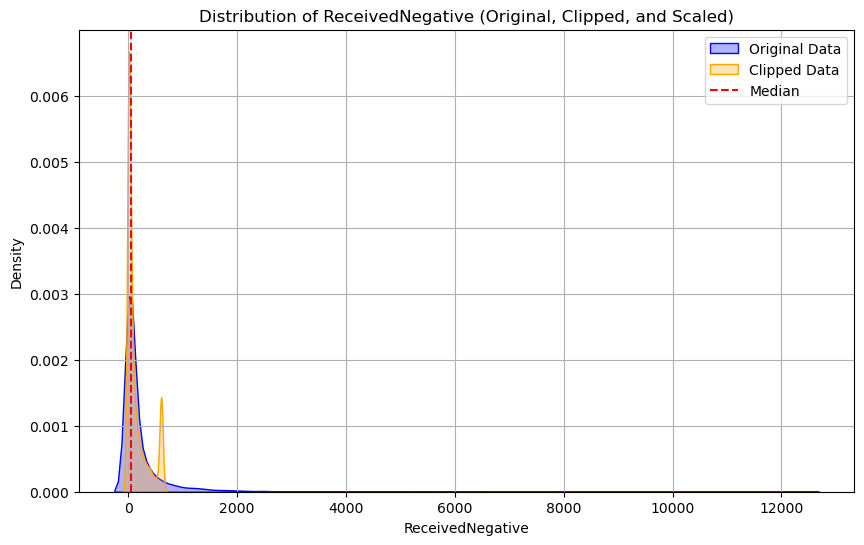

In [146]:
sdata['ReceivedNegative'] = clip_and_scale(data,'ReceivedNegative',0,90)

Percentiles for column 'ReceivedPositive':
  0th percentile: 0.0
  10th percentile: 4.0
  20th percentile: 25.0
  30th percentile: 64.0
  40th percentile: 132.0
  50th percentile: 244.0
  60th percentile: 433.0
  70th percentile: 758.0
  80th percentile: 1340.0
  90th percentile: 2745.0
  100th percentile: 44176.0


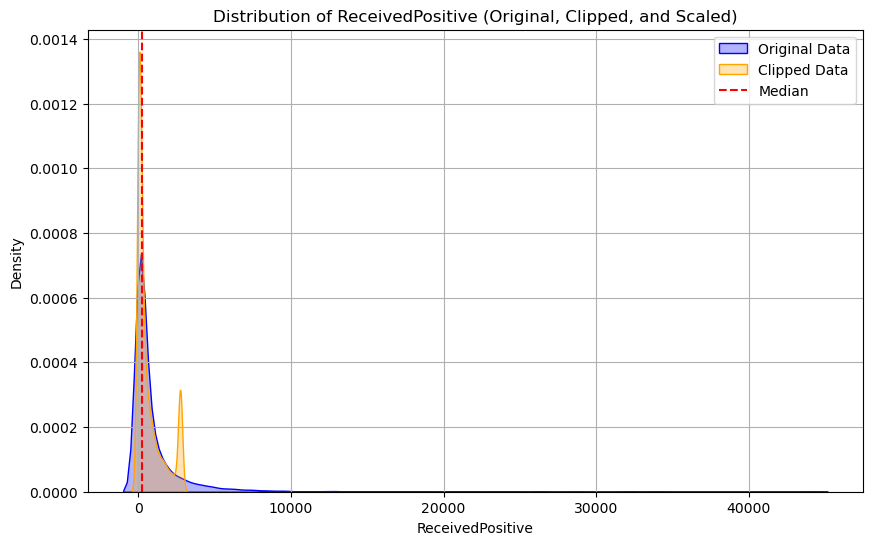

In [147]:
sdata['ReceivedPositive'] = clip_and_scale(data,'ReceivedPositive',0,90)

Percentiles for column 'VoteNegative':
  0th percentile: 0.0
  10th percentile: 2.0
  20th percentile: 5.0
  30th percentile: 12.0
  40th percentile: 24.0
  50th percentile: 44.0
  60th percentile: 77.0
  70th percentile: 137.0
  80th percentile: 258.0
  90th percentile: 579.0
  100th percentile: 11207.0


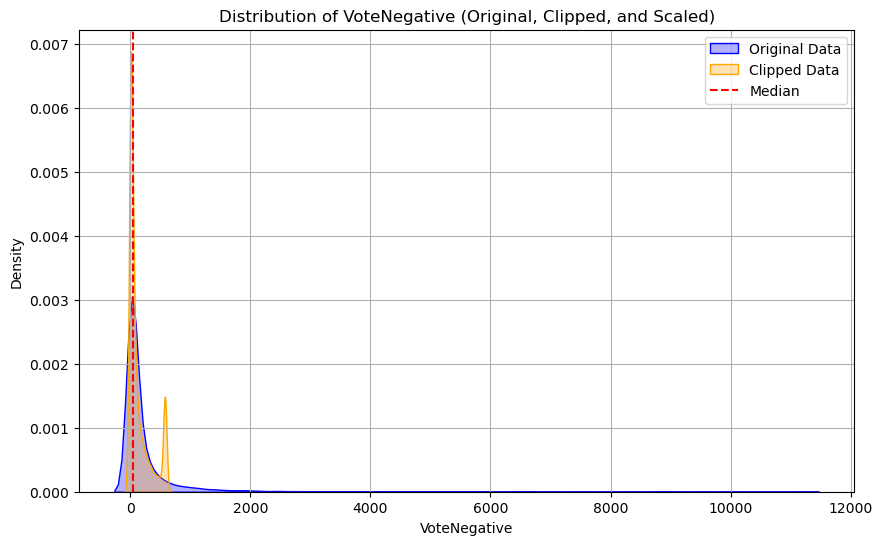

In [148]:
sdata['VoteNegative'] = clip_and_scale(data,'VoteNegative',0,90)

Percentiles for column 'VotePositive':
  0th percentile: 0.0
  10th percentile: 10.0
  20th percentile: 33.0
  30th percentile: 71.0
  40th percentile: 135.0
  50th percentile: 230.0
  60th percentile: 391.0
  70th percentile: 670.0
  80th percentile: 1231.0
  90th percentile: 2560.5
  100th percentile: 27364.0


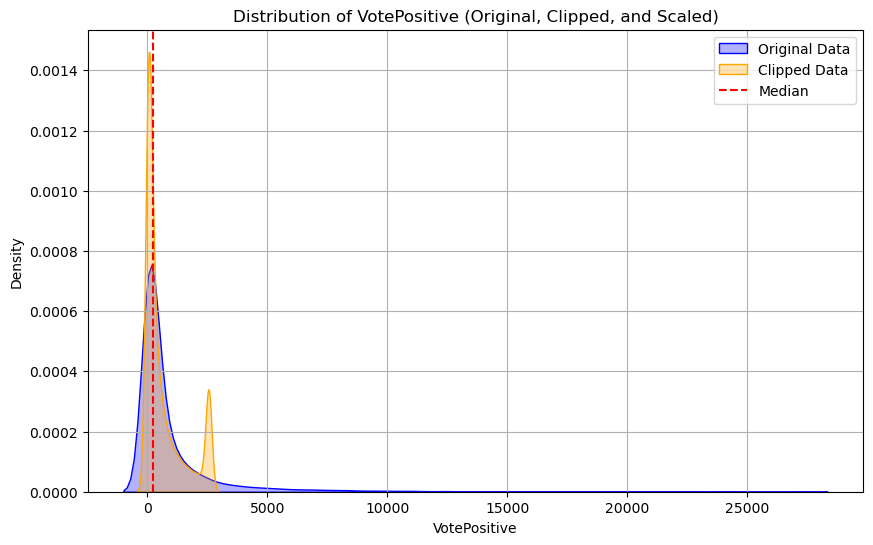

In [149]:
sdata['VotePositive'] = clip_and_scale(data,'VotePositive',0,90)

Percentiles for column 'PostReplied':
  0th percentile: 0.0
  10th percentile: 0.0
  20th percentile: 3.0
  30th percentile: 7.0
  40th percentile: 14.0
  50th percentile: 26.0
  60th percentile: 47.0
  70th percentile: 87.0
  80th percentile: 164.0
  90th percentile: 362.0
  100th percentile: 3739.0


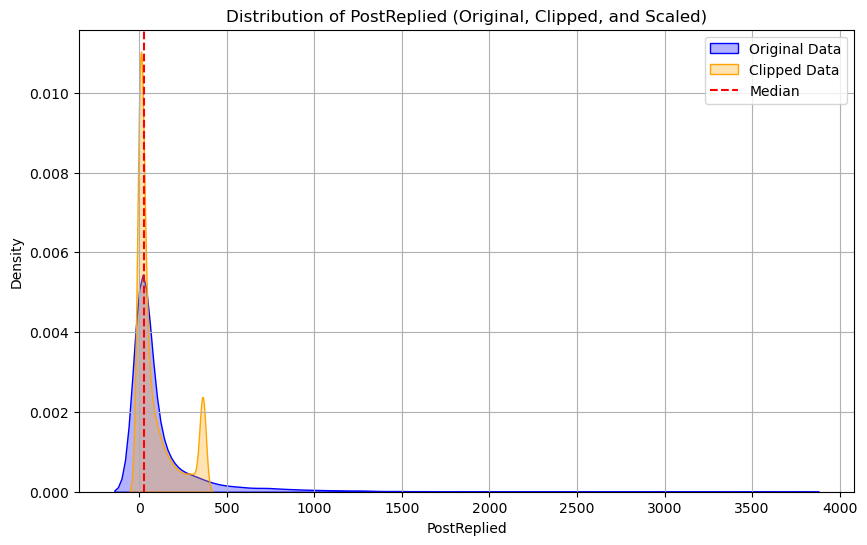

In [150]:
sdata['PostReplied'] = clip_and_scale(data,'PostReplied',0,90)

Percentiles for column 'UserFollowed':
  0th percentile: 0.0
  10th percentile: 0.0
  20th percentile: 0.0
  30th percentile: 0.0
  40th percentile: 0.0
  50th percentile: 0.0
  60th percentile: 0.0
  70th percentile: 0.0
  80th percentile: 1.0
  90th percentile: 3.0
  100th percentile: 103.0


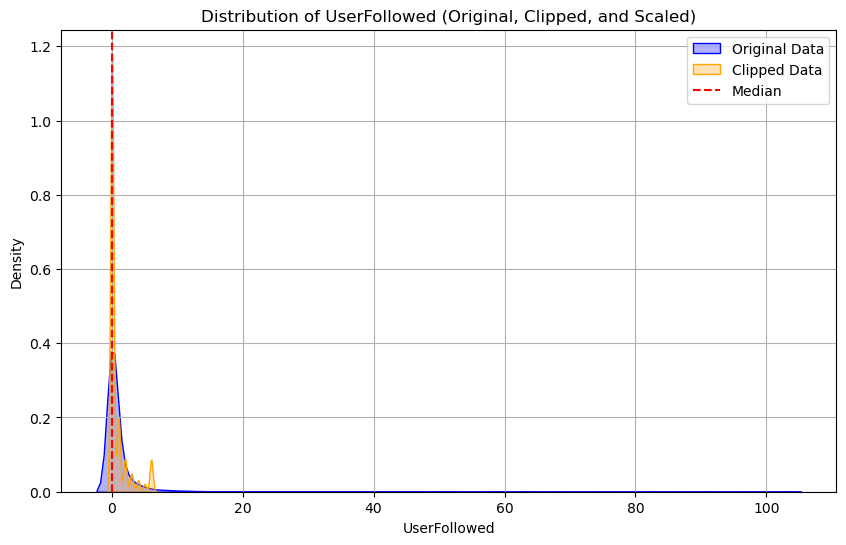

In [151]:
sdata['UserFollowed'] = clip_and_scale(data,'UserFollowed',0,95)

Percentiles for column 'GotPostReplied':
  0th percentile: 0.0
  10th percentile: 0.0
  20th percentile: 3.0
  30th percentile: 9.0
  40th percentile: 18.0
  50th percentile: 33.0
  60th percentile: 58.0
  70th percentile: 103.0
  80th percentile: 181.0
  90th percentile: 381.0
  100th percentile: 4330.0


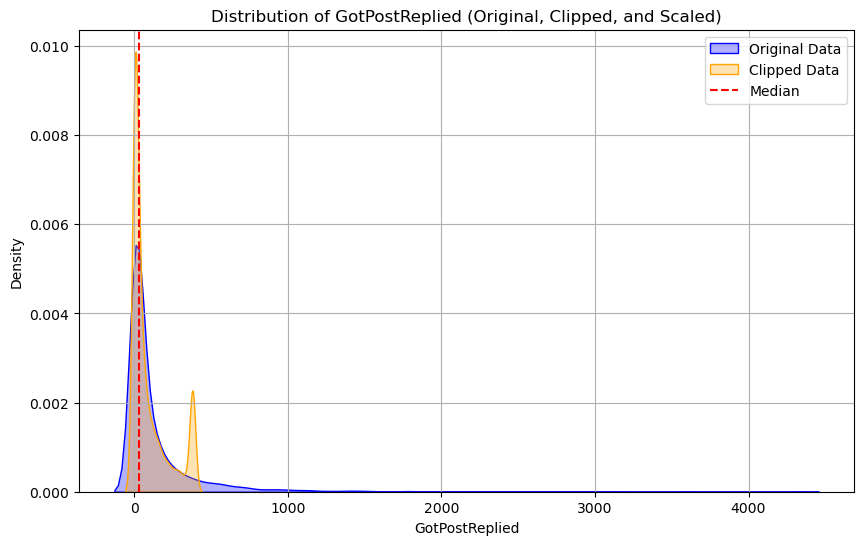

In [152]:
sdata['GotPostReplied'] = clip_and_scale(data,'GotPostReplied',0,90)

Percentiles for column 'GotFollowers':
  0th percentile: 0.0
  10th percentile: 0.0
  20th percentile: 0.0
  30th percentile: 0.0
  40th percentile: 0.0
  50th percentile: 0.0
  60th percentile: 0.0
  70th percentile: 1.0
  80th percentile: 1.0
  90th percentile: 3.0
  100th percentile: 592.0


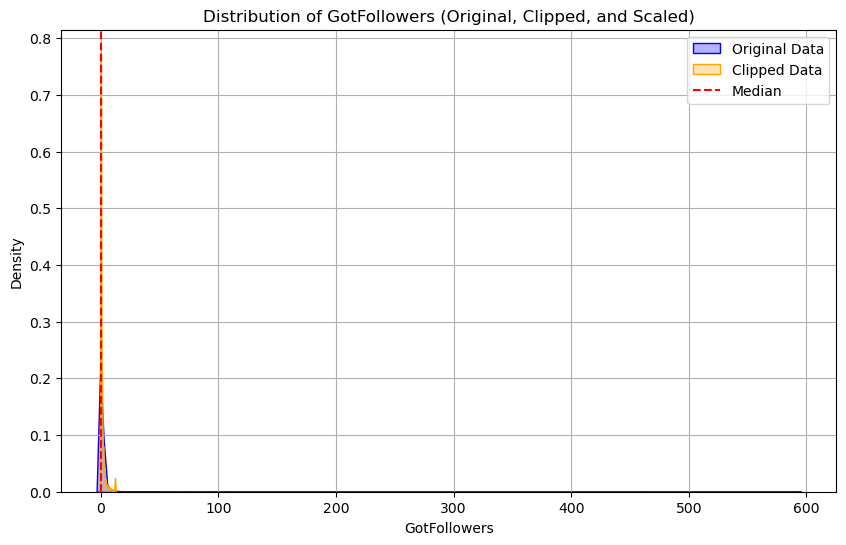

In [153]:
sdata['GotFollowers'] = clip_and_scale(data,'GotFollowers',0,98)

Percentiles for column 'PostsAmount':
  0th percentile: 0.0
  10th percentile: 3.0
  20th percentile: 11.0
  30th percentile: 27.0
  40th percentile: 53.0
  50th percentile: 94.0
  60th percentile: 170.0
  70th percentile: 300.0
  80th percentile: 541.0
  90th percentile: 1135.4000000000015
  100th percentile: 9023.0


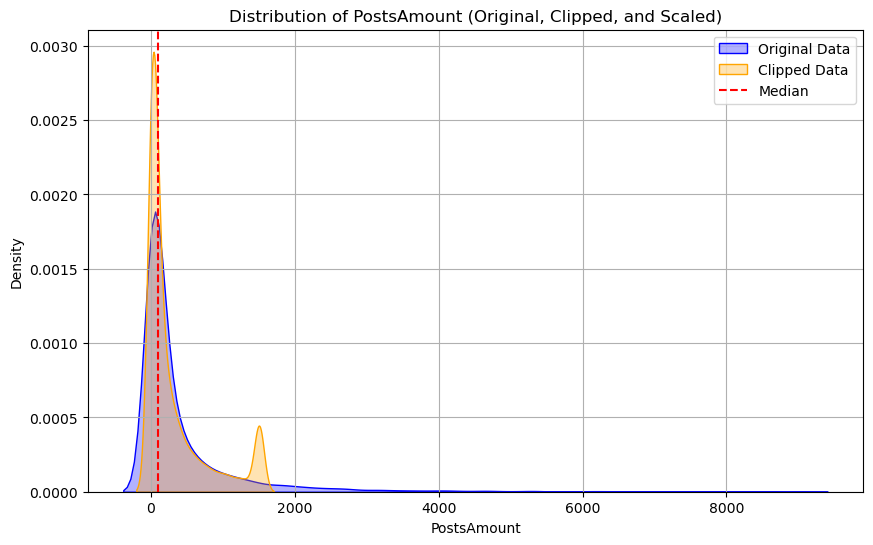

In [154]:
sdata['PostsAmount'] = clip_and_scale(data,'PostsAmount',0,93)

Percentiles for column 'TopicsPostedIn':
  0th percentile: 0.0
  10th percentile: 2.0
  20th percentile: 6.0
  30th percentile: 11.0
  40th percentile: 16.0
  50th percentile: 21.0
  60th percentile: 28.0
  70th percentile: 35.0
  80th percentile: 44.0
  90th percentile: 55.0
  100th percentile: 87.0


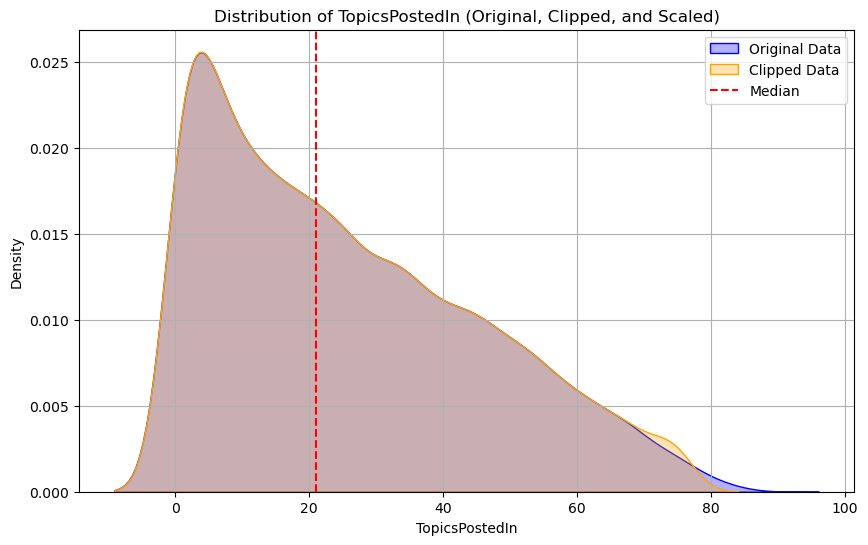

In [155]:
sdata['TopicsPostedIn'] = clip_and_scale(data,'TopicsPostedIn',0,99)

In [156]:
data[['PostsAmount', 	'TopicsPostedIn',	'MostPopularTopicPostsAmount']]

,PostsAmount,TopicsPostedIn,MostPopularTopicPostsAmount
0,2.0,2.0,1.0
2,93.0,22.0,30.0
3,24.0,11.0,5.0
8,349.0,31.0,94.0
10,0.0,0.0,0.0
...,...,...,...
59099,6.0,2.0,5.0
59462,1.0,1.0,1.0
59706,0.0,0.0,0.0
59789,17.0,5.0,6.0


In [157]:
data['TopicsDiversity'] =  np.exp ((data.PostsAmount / data.TopicsPostedIn ) / data.MostPopularTopicPostsAmount )

Percentiles for column 'TopicsDiversity':
  0th percentile: 1.0203499282873136
  10th percentile: 1.0707923727630537
  20th percentile: 1.0954580600969694
  30th percentile: 1.12335809377173
  40th percentile: 1.155955802319776
  50th percentile: 1.1988059351445868
  60th percentile: 1.2633491293182952
  70th percentile: 1.3621861999838134
  80th percentile: 1.5423902651101744
  90th percentile: 1.9477340410546757
  100th percentile: 2.718281828459045


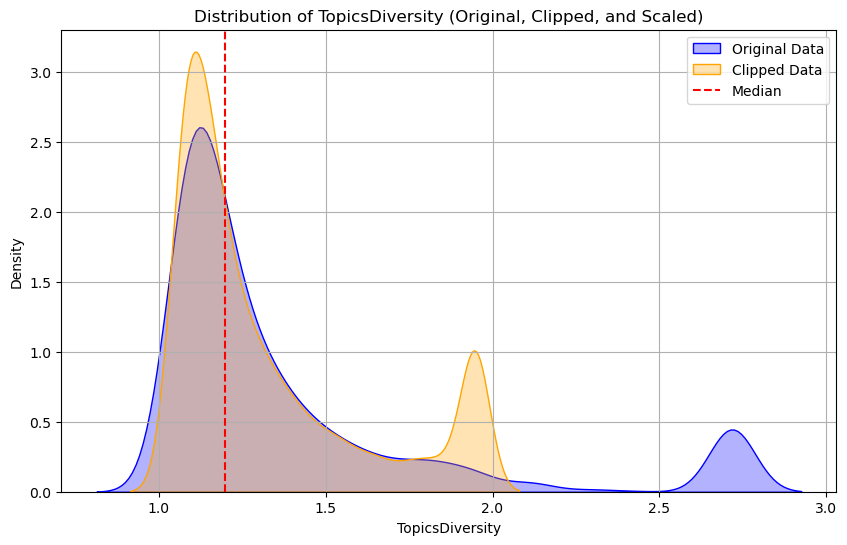

In [169]:
sdata['TopicsDiversity'] = clip_and_scale(data,'TopicsDiversity',2,90) - 0.659880

In [185]:
sdata = sdata.drop(columns='MostPopularTopicPostsAmount')

In [171]:
data

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,MostPopularTopicPostsAmount,TopicsDiversity
0,4,178.0,4.462151,0.0,6.0,5.0,50.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,2.718282
2,30,316.0,41.195219,117.0,288.0,10.0,194.0,18.0,0.0,76.0,0.0,93.0,22.0,30.0,1.151320
3,38,317.0,5.896414,3.0,59.0,1.0,5.0,9.0,0.0,6.0,0.0,24.0,11.0,5.0,1.547071
8,77,50.0,43.585657,285.0,486.0,0.0,0.0,64.0,0.0,117.0,0.0,349.0,31.0,94.0,1.127234
10,106,498.0,0.079681,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59099,667204,119.0,2.549801,6.0,20.0,5.0,8.0,2.0,0.0,2.0,0.0,6.0,2.0,5.0,1.822119
59462,674233,17.0,0.239044,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.718282
59706,679031,364.0,1.274900,0.0,0.0,4.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
59789,680740,296.0,9.960159,10.0,30.0,28.0,105.0,4.0,0.0,5.0,0.0,17.0,5.0,6.0,1.762383


In [180]:
data.to_csv('Agg_Data/data_with_nan.csv',index=False)

In [186]:
sdata.to_csv('Agg_Data/scaled_data_with_nan.csv',index=False)

In [182]:
data.dropna().to_csv('Agg_Data/clear_data.csv',index=False)

In [187]:
sdata.dropna().to_csv('Agg_Data/clear_scaled_data.csv',index=False)